Logistic Regression

In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
X,y = load_breast_cancer(return_X_y=True)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [61]:
models = LogisticRegression()

In [63]:
models.fit(X_train[:100],y_train[:100])

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred = models.predict(X_test)

In [65]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.956140350877193


Linear Regression

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np


In [45]:
data = fetch_california_housing()
print(data.feature_names)

X = pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [46]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
mse = mean_squared_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

print("mean squared Error:" ,mse)
print("R2 score: ",r2)

mean squared Error: 0.555891598695244
R2 score:  0.5757877060324511


Decision Tree

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [14]:
iris = load_iris()
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [15]:
print("accuacy",decision_tree.score(X_test,y_test))

accuacy 1.0


Decision Tree Regressor

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
data =fetch_california_housing()
X= data.data
y=data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

regressor = DecisionTreeRegressor(max_depth=3,random_state=0)
regressor.fit(X_train,y_train)

print("Model R2 score: ",regressor.score(X_test,y_test))

Model R2 score:  0.5157041192720015


Support Vector Machine

In [27]:
from sklearn import datasets
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [33]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

X = X[y !=2]
y = y[y !=2]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

model = SVC(kernel='linear' , C=1.0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



K Nearest Neighbors(KNN)

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [41]:
iris = load_iris()
X,y = iris.data,iris.target

# standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# KNN
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [42]:
# predict & evaluate
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8888888888888888


K Means

In [44]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [80]:
# Generate synthetic data
X,_ = make_blobs(n_samples=300,centers=4,cluster_std=0.6)

# K-Means
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [49]:
#  silhouette Score
score = silhouette_score(X,y_kmeans)
print(f"Silhousette Score: {score:2f}")

Silhousette Score: 0.831720


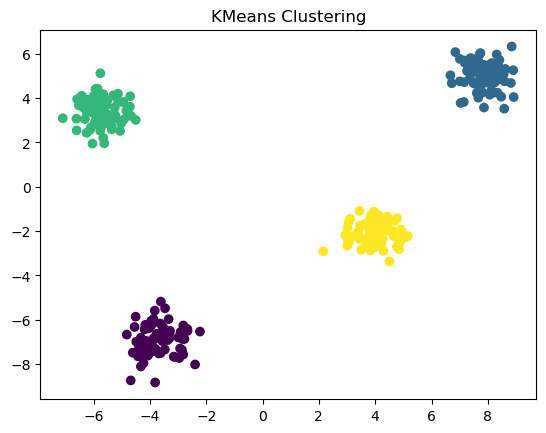

In [82]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red')
plt.title("KMeans Clustering")
plt.show()

Hierarchical Clustering(Agglomerative)

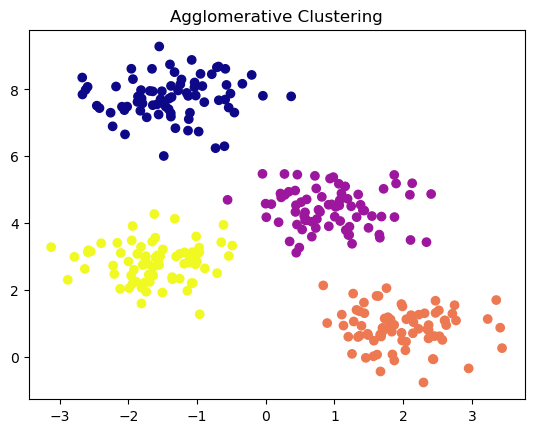

Silhousette Score: -0.057797


In [77]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
model = AgglomerativeClustering(n_clusters = 4)
y_model = model.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=y_model,cmap='plasma')
plt.title("Agglomerative Clustering")
plt.show()
score = silhouette_score(X,y_kmeans)
print(f"Silhousette Score: {score:2f}")

DBSCAN

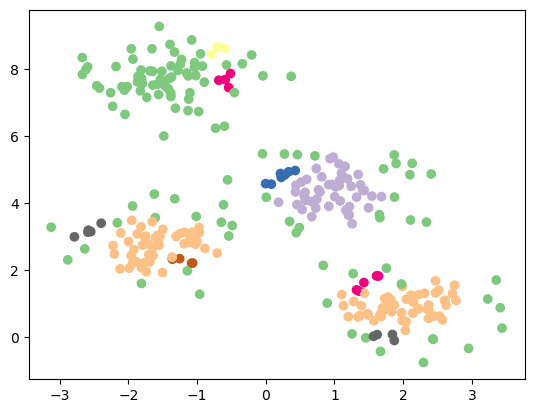

In [76]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3,min_samples=5)
y=model.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=y,cmap ='Accent')
plt.show()